<a href="https://colab.research.google.com/github/YuvanBharathi13/DeepLearning/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Classification with Neural Networks in TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Creating data to view and fit  

In [2]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=1000, noise=0.03, random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
X.shape

(1000, 2)

In [5]:
np.get_printoptions()

{'edgeitems': 3,
 'threshold': 1000,
 'floatmode': 'maxprec',
 'precision': 8,
 'suppress': False,
 'linewidth': 75,
 'nanstr': 'nan',
 'infstr': 'inf',
 'sign': '-',
 'formatter': None,
 'legacy': False}

In [6]:
np.set_printoptions(threshold=100)

In [7]:
np.get_printoptions()

{'edgeitems': 3,
 'threshold': 100,
 'floatmode': 'maxprec',
 'precision': 8,
 'suppress': False,
 'linewidth': 75,
 'nanstr': 'nan',
 'infstr': 'inf',
 'sign': '-',
 'formatter': None,
 'legacy': False}

In [8]:
y # Binary Classification problem

array([1, 1, 1, ..., 1, 0, 0])

In [9]:
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


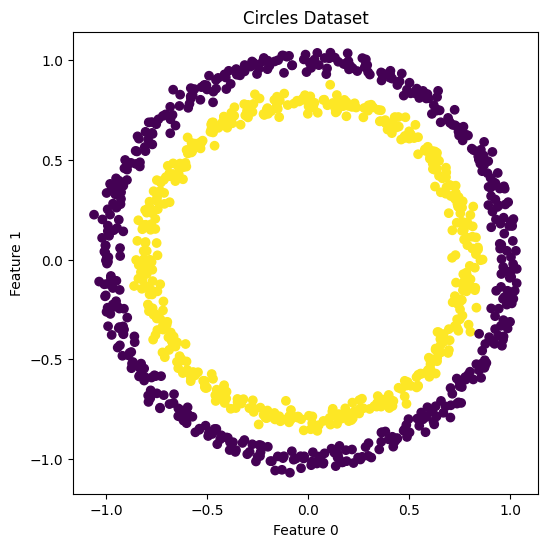

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(circles['X0'],circles['X1'],c=circles['label'])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Circles Dataset")
plt.show()

* The two indpendent features are nothing but coordinates on the x and y axis. based on their distance from the centre they are classified as 1 and 0.

## Input and Output Shapes

In [11]:

X.shape, y.shape

((1000, 2), (1000,))

## Building the model

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Creating a model without any non-linear activation function and using SGD as the optimizer

In [13]:
# Setting the seed
tf.random.set_seed(42)

# Creating the model
model1 = tf.keras.Sequential([
    tf.keras.Input((2,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compiling the model
model1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
           optimizer = tf.keras.optimizers.SGD(),
           metrics = ['accuracy'])

# Fitting the model
model1.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4839 - loss: 1.3926
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5003 - loss: 0.6957
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4531 - loss: 0.6956
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4507 - loss: 0.6956
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4478 - loss: 0.6956
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4478 - loss: 0.6956
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4478 - loss: 0.6956
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4478 - loss: 0.6956
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4478 - loss: 0.6956
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4478 - loss: 0.6956
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4478 - loss: 0.6956
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [14]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,323 (5.17 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [15]:
y_pred1 = model1.predict(X_test)
y_pred1

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0.4982946 ],
       [0.5061096 ],
       [0.47877613],
       ...,
       [0.4961176 ],
       [0.49146417],
       [0.5051954 ]], dtype=float32)

In [16]:
model1.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4238 - loss: 0.6971


[0.6953775882720947, 0.46000000834465027]

### Creating a model without any non-linear activation function and using Adam as the optimizer

In [17]:
X_train.shape, y_train.shape

((800, 2), (800,))

In [18]:
# Setting the seed
tf.random.set_seed(42)

# Creating the model
model2 = tf.keras.Sequential([
    tf.keras.Input((2,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compiling the model
model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fitting the model
model2.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4879 - loss: 4.0476
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4455 - loss: 1.5168
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4905 - loss: 0.7118
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4518 - loss: 0.6957
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4957 - loss: 0.6935
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4944 - loss: 0.6938
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4913 - loss: 0.6939
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4867 - loss: 0.6939
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4887 - loss: 0.6940
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4880 - loss: 0.6940 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4881 - loss: 0.6941 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accurac

In [19]:
model2.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4342 - loss: 0.7006


[0.6968297362327576, 0.4699999988079071]

In [20]:
y_pred2 = model2.predict(X_test)
y_pred2

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.5211798 ],
       [0.53169817],
       [0.48857832],
       ...,
       [0.50416577],
       [0.5115691 ],
       [0.5272439 ]], dtype=float32)

In [21]:
def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together:

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


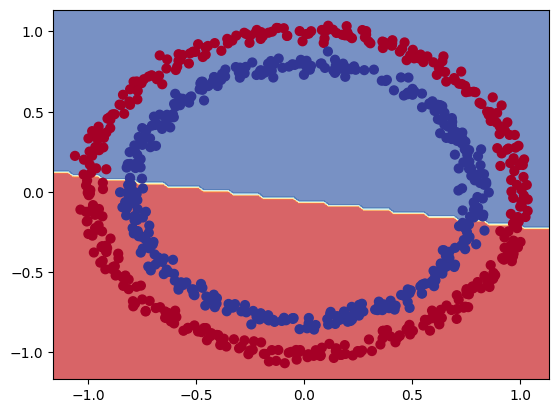

In [22]:
plot_decision_boundary(model2,X_train,y_train)

### Model with non-linearity and Adama optimzer

In [23]:
# Setting the seed
tf.random.set_seed(42)

# Creating the model
model3 = tf.keras.Sequential([
    tf.keras.Input((2,)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compiling the model
model3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fitting the model
model3.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4608 - loss: 0.6947
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5132 - loss: 0.6882 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5326 - loss: 0.6847
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5541 - loss: 0.6798
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5730 - loss: 0.6738 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5942 - loss: 0.6658
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6164 - loss: 0.6555
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7244 - loss: 0.6398 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8136 - loss: 0.6236
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8834 - loss: 0.6019 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9523 - loss: 0.5779 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accu

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


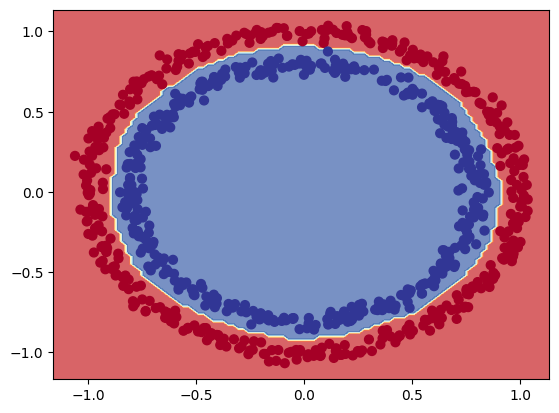

In [24]:
plot_decision_boundary(model3,X_train,y_train)

### 4*4 model with non-linearity but last neuron is LINEAR

In [25]:
# Setting the random seed
tf.random.set_seed(42)

# Creating the model
model4 = tf.keras.Sequential([
    tf.keras.Input((2,)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compiling the model
model4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fitting the model
model4.fit(X_train,y_train,epochs=250)

Epoch 1/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5025 - loss: 4.6169
Epoch 2/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5019 - loss: 4.2404
Epoch 3/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4431 - loss: 4.0779
Epoch 4/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4349 - loss: 3.8124
Epoch 5/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4357 - loss: 3.7652
Epoch 6/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4544 - loss: 3.7256
Epoch 7/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4552 - loss: 3.7019
Epoch 8/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4585 - loss: 3.6396
Epoch 9/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4602 - loss: 3.6289
Epoch 10/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4632 - loss: 3.6098
Epoch 11/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4625 - loss: 3.5869
Epoch 12/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

* CRAZY ouput. Accuracy is 98.93% but so much indecision. HOW ?  

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


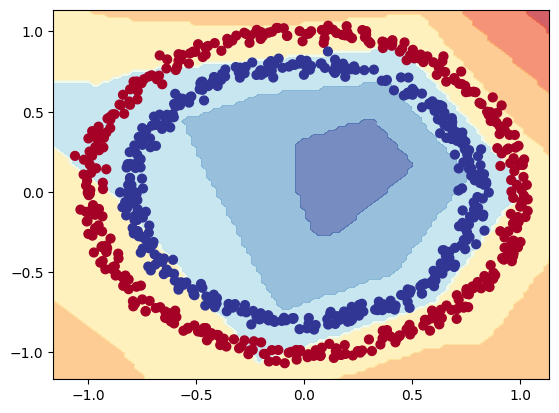

In [26]:
plot_decision_boundary(model4,X_train,y_train)

### Making the output neuron have ReLu

In [27]:
# settign the random seed
tf.random.set_seed(42)

# Creating the model
model5 = tf.keras.Sequential([
    tf.keras.Input((2,)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="relu")
])

# Compiling the model
model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fitting the model
model5.fit(X_train,y_train,epochs=250)

Epoch 1/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5025 - loss: 5.5810
Epoch 2/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 4.6765
Epoch 3/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 3.6955 
Epoch 4/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5020 - loss: 2.6236
Epoch 5/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4568 - loss: 1.3497 
Epoch 6/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4281 - loss: 0.9957 
Epoch 7/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4448 - loss: 0.9469 
Epoch 8/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4634 - loss: 0.9161
Epoch 9/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4555 - loss: 0.8921
Epoch 10/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4622 - loss: 0.8722
Epoch 11/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4697 - loss: 0.8554 
Epoch 12/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accu

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


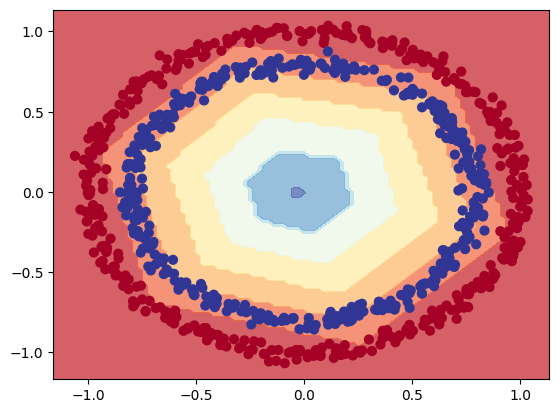

In [28]:
plot_decision_boundary(model5,X_train,y_train)

### Making the output neuron have Sigmoid

In [29]:
# settign the random seed
tf.random.set_seed(42)

# Creating the model
model6 = tf.keras.Sequential([
    tf.keras.Input((2,)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compiling the model
model6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fitting the model
history6 = model6.fit(X_train,y_train,epochs=250)

Epoch 1/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4932 - loss: 0.7509
Epoch 2/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4909 - loss: 0.7373
Epoch 3/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4742 - loss: 0.7279
Epoch 4/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4605 - loss: 0.7215
Epoch 5/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4639 - loss: 0.7168
Epoch 6/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4440 - loss: 0.7132
Epoch 7/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4143 - loss: 0.7101
Epoch 8/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3745 - loss: 0.7075
Epoch 9/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3528 - loss: 0.7042
Epoch 10/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3595 - loss: 0.7010
Epoch 11/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4170 - loss: 0.6981
Epoch 12/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


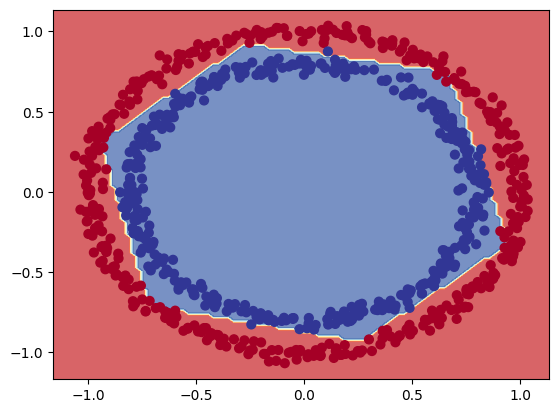

In [30]:
plot_decision_boundary(model6,X_train,y_train)

## Leraning rate Manipulation

In [31]:
# Same model as model6 but with a higher learning rate so the model can learn faster

In [42]:
# setting the seed
tf.random.set_seed(42)

# Creating the model
model7 = tf.keras.Sequential([
    tf.keras.Input((2,)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")])

# Compiling the model
model7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), # changing from default 0.001
               metrics = ['accuracy'])

# Fitting the model
history7 = model7.fit(X_train,y_train,epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5287 - loss: 0.6922
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5095 - loss: 0.6881
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5276 - loss: 0.6846
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5352 - loss: 0.6788
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6151 - loss: 0.6659
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6406 - loss: 0.6405
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7241 - loss: 0.5985 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8723 - loss: 0.5336 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9339 - loss: 0.4430 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9945 - loss: 0.3402 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9977 - loss: 0.2612
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9963 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


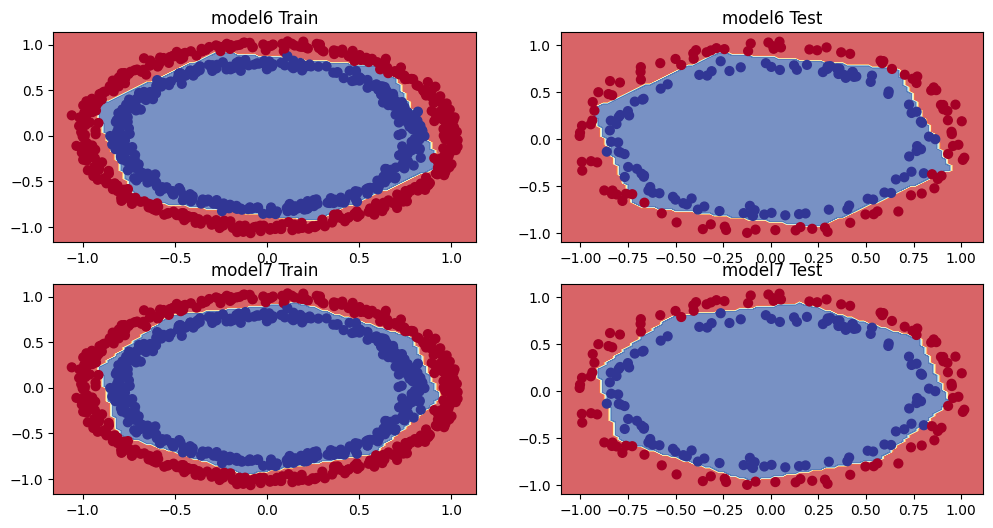

In [43]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.title("model6 Train")
plot_decision_boundary(model6, X=X_train, y=y_train)
plt.subplot(2, 2, 2)
plt.title("model6 Test")
plot_decision_boundary(model6, X=X_test, y=y_test)
plt.subplot(2, 2, 3)
plt.title("model7 Train")
plot_decision_boundary(model7, X=X_train, y=y_train)
plt.subplot(2, 2, 4)
plt.title("model7 Test")
plot_decision_boundary(model7, X=X_test, y=y_test)
plt.show()

In [44]:
model7.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9855 - loss: 0.0415


[0.03766961768269539, 0.9900000095367432]

### History of loss change (model6 vs model7)

Text(0.5, 1.0, 'Loss after epoch for model6')

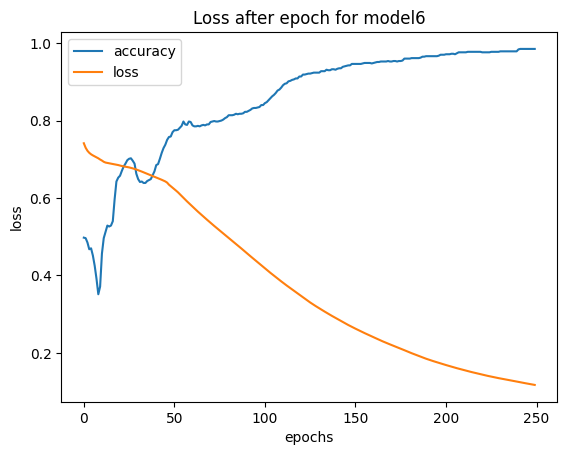

In [45]:
pd.DataFrame(history6.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Loss after epoch for model6")

Text(0.5, 1.0, 'Loss after epoch for model7')

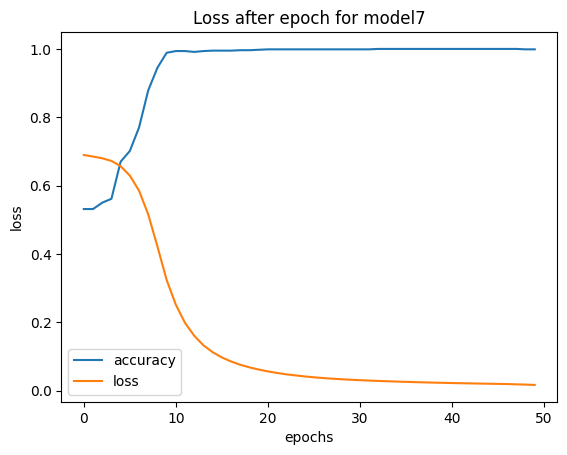

In [46]:
pd.DataFrame(history7.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Loss after epoch for model7")

In [47]:
df = pd.DataFrame(history7.history)
df.head(10)

,accuracy,loss
0,0.53125,0.689458
1,0.53125,0.685002
2,0.55000,0.679835
3,0.56125,0.672132
4,0.67000,0.656809
5,0.70125,0.629283
6,0.77000,0.585151
7,0.87875,0.515500
8,0.94500,0.421590
9,0.98875,0.323698


## Ideal Learning Rate

* A learning rate callback - You can think of a callback as an extra piece of functionality you can add to your model while its training.

In [38]:
# Set the random seed
tf.random.set_seed(42)

# Create the mdoel
model8 = tf.keras.Sequential([
    tf.keras.Input((2,)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")])

# Compile the model
model8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# creating a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing in the lr_scheduler)
history8 = model8.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4889 - loss: 0.7016 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4880 - loss: 0.7014 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4840 - loss: 0.7011 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4731 - loss: 0.7008 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4813 - loss: 0.7005 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4779 - loss: 0.7002 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4779 - loss: 0.6998 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4732 - loss: 0.6994 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4733 - loss: 0.6990 - learning_

Text(0.5, 1.0, 'Loss after epoch for model8')

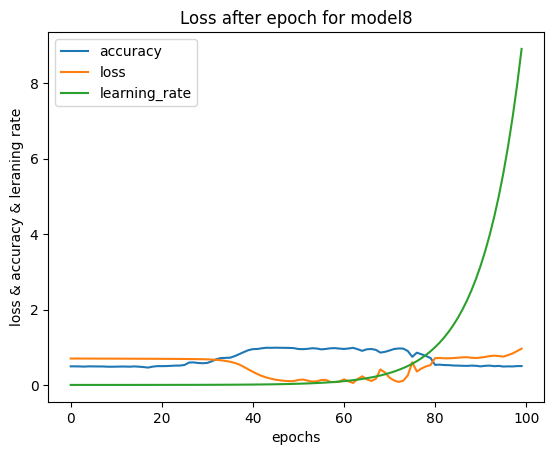

In [39]:
pd.DataFrame(history8.history).plot()
plt.ylabel("loss & accuracy & leraning rate")
plt.xlabel("epochs");
plt.title("Loss after epoch for model8")

In [40]:
# Learning rate vs loss
df8 = pd.DataFrame(history8.history)
df8

,accuracy,loss,learning_rate
0,0.49250,0.699980,0.000100
1,0.49250,0.699746,0.000112
2,0.49000,0.699498,0.000126
3,0.48625,0.699234,0.000141
4,0.49250,0.698950,0.000158
...,...,...,...
95,0.48750,0.751075,5.623413
96,0.49250,0.789199,6.309574
97,0.49000,0.833367,7.079458
98,0.50000,0.898084,7.943282


Text(0.5, 1.0, 'Learning Rate vs Loss')

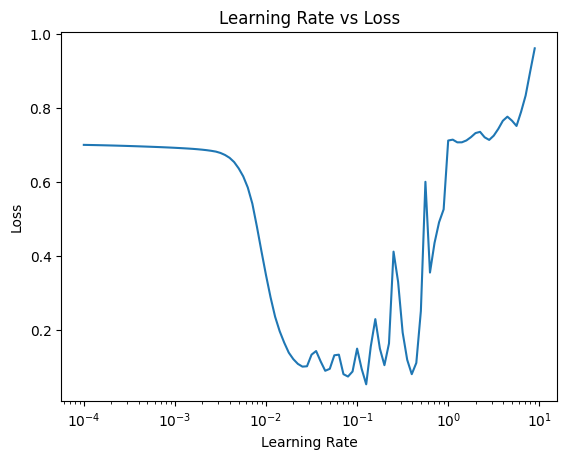

In [55]:
plt.semilogx(df8['learning_rate'],df8['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

* From the above graph we can clearly tell that the section of the graph where there is the steepest fall in the loss value is the best learning rate. In this case it happens to be **~ 0.01**.

* Since we have found that the ideal learning rate is 0.01, lets try to increase the learning rate by **0.01** to see if the model can learn faster in lesser epochs than the model with **0.01** did with higher number of epochs

In [53]:
# Setting the seed
tf.random.set_seed(42)

# Creating the model
model9 = tf.keras.Sequential([
    tf.keras.Input((2,)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),

])

# Compiling the model
model9.compile(loss = "binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
               metrics = ['accuracy'])

# Fitting the model
history9 = model9.fit(X_train,y_train,epochs=45) # previously we have used 50 epochs

Epoch 1/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4678 - loss: 0.7226
Epoch 2/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5248 - loss: 0.6885
Epoch 3/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5320 - loss: 0.6830 
Epoch 4/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5704 - loss: 0.6696 
Epoch 5/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6485 - loss: 0.6466 
Epoch 6/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6836 - loss: 0.6121 
Epoch 7/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7485 - loss: 0.5654
Epoch 8/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8442 - loss: 0.5148 
Epoch 9/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8660 - loss: 0.4643 
Epoch 10/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8748 - loss: 0.4210
Epoch 11/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8753 - loss: 0.3827 
Epoch 12/45
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.90

* We can see that the training accuracy is almost the same.

Text(0.5, 1.0, 'Loss after epoch for model9')

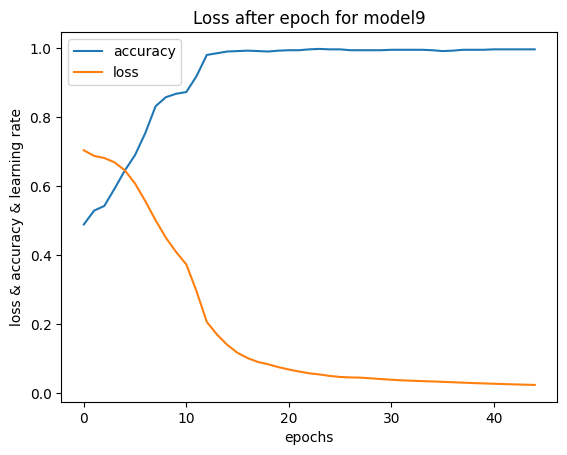

In [54]:
pd.DataFrame(history9.history).plot()
plt.ylabel("loss & accuracy & learning rate")
plt.xlabel("epochs");
plt.title("Loss after epoch for model9")

In [56]:
# Evaluating model9
model9.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9811 - loss: 0.0542


[0.05187790468335152, 0.9800000190734863]

In [58]:
# Evaluating model 7
model7.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9855 - loss: 0.0415


[0.03766961768269539, 0.9900000095367432]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


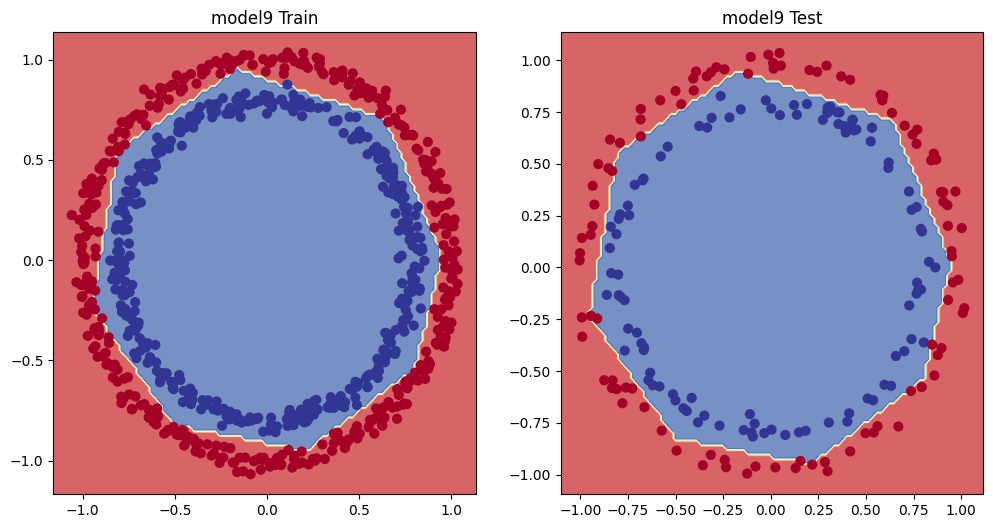

In [59]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("model9 Train")
plot_decision_boundary(model9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("model9 Test")
plot_decision_boundary(model9, X=X_test, y=y_test)
plt.show()

## Confusion Matrix

In [62]:
from sklearn.metrics import confusion_matrix
y_preds9 = model9.predict(X_test)
# Rounding our prediction values to 0 and 1
y_preds9 = np.round(y_preds9)
cm9 = confusion_matrix(y_test,y_preds9)
cm9

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[ 96,   4],
       [  0, 100]])

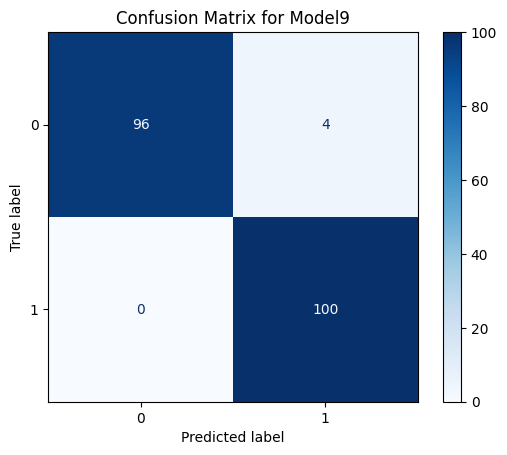

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm9)
disp.plot(cmap='Blues', values_format='d')  # 'd' displays as integers
plt.title('Confusion Matrix for Model9')
plt.show()